# Analiza zbioru dotyczącego ogłoszeń sprzedaży samochodów marki Toyota

### Jakub Darul, Mateusz Lamla

Dane, które wybraliśmy pochodzą ze strony https://www.kaggle.com/datasets/nopsam/dataset-toyota?resource=download

Zbiór składa się z prawie 7 tysięcy rekordów oraz 9 kolumn:
- model
- year
- price
- transmission
- mileage
- fuelType
- tax
- mpg
- engineSize

#### Import bibliotek potrzebnych do analizy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Przygotowanie danych

Wczytanie danych, wyświetlenie początkowych rekordów oraz podstawowych informacji o zbiorze.

In [2]:
df = pd.read_csv("data/toyota.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
print(f"Sumaryczna ilość braków w rekordach zbioru: {df.isna().sum().sum()}")

Sumaryczna ilość braków w rekordach zbioru: 0


##### Przygotowanie danych do analizy poprzez:
- usunięcie niepotrzebnych kolumn
- przeliczenie jednostek (mpg -> l/100km, mileage -> km)
- usunięcie rekordów z nieprawidłowymi wartościami
- dodanie kolumny z wiekiem samochodu

In [6]:
df["l/100km"] = (282.481 / df['mpg']).round(2)
df['km'] = (df['mileage'] * 1.60934).round(0).astype(int)
df.drop('mileage', axis=1, inplace=True)
df.drop('mpg', axis=1, inplace=True)
df.drop('tax', axis=1, inplace=True)
df['age'] = 2026 - df['year']
df.loc[df['age'] <= 0, 'age'] = 1
df = df[df['l/100km'] <= 20]

##### Wyświetlenie podstawowych informacji o wartościach numerycznych po modyfikacji kolumn zbioru

In [7]:
df.describe()

,year,price,engineSize,l/100km,km,age
count,6727.000000,6727.000000,6727.000000,6727.000000,6727.000000,6727.000000
mean,2016.743868,12498.899807,1.469957,4.709150,36833.794113,9.256132
std,2.203169,6317.664106,0.435029,1.103344,30779.476380,2.203169
min,1998.000000,850.000000,0.000000,1.200000,3.000000,6.000000
25%,2016.000000,8278.500000,1.000000,4.045000,15231.000000,8.000000
50%,2017.000000,10795.000000,1.500000,4.500000,29887.000000,9.000000
75%,2018.000000,14995.000000,1.800000,5.100000,50063.500000,10.000000
max,2020.000000,59995.000000,4.500000,11.820000,280699.000000,28.000000


##### Końcowa struktura naszego zbioru

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6727 non-null   object 
 1   year          6727 non-null   int64  
 2   price         6727 non-null   int64  
 3   transmission  6727 non-null   object 
 4   fuelType      6727 non-null   object 
 5   engineSize    6727 non-null   float64
 6   l/100km       6727 non-null   float64
 7   km            6727 non-null   int32  
 8   age           6727 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 499.3+ KB


## Analiza danych

#### Stworzenie macierzy korelacji dla wartości numerycznych w zbiorze danych

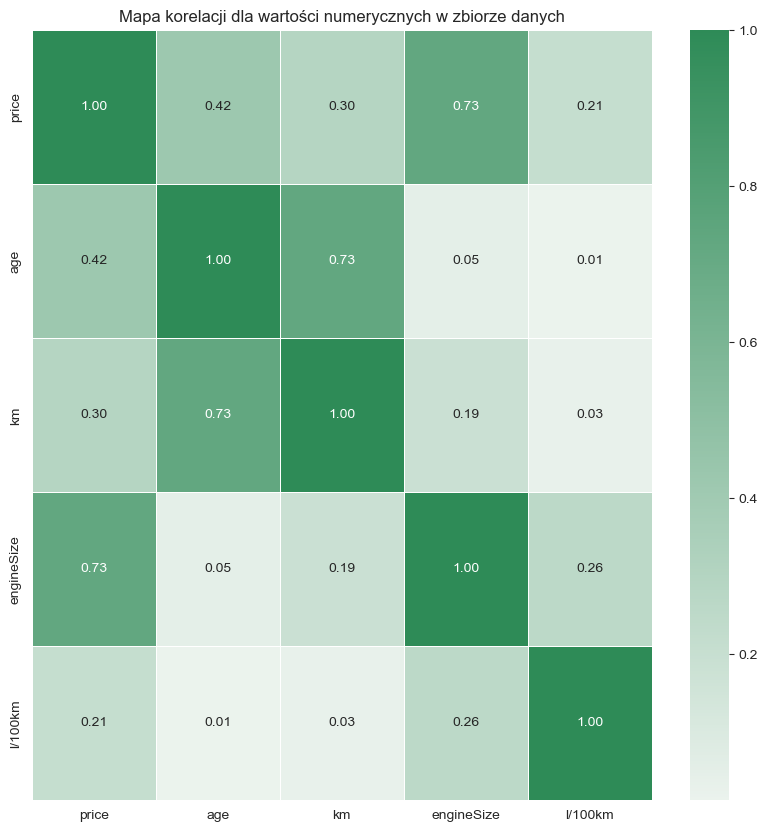

In [9]:
cor = df[['price','age','km','engineSize','l/100km']].corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title("Mapa korelacji dla wartości numerycznych w zbiorze danych")
plt.show()

##### Wnioski:
Z ceną samochodu najsilniej korelują cechy takie jak rozmiar silnika oraz wiek pojazdu

#### Najczęściej występujące modele samochodów

In [10]:
top_models = df['model'].value_counts().head(5)
top_models

model
Yaris    2122
Aygo     1961
Auris     712
C-HR      478
RAV4      473
Name: count, dtype: int64

##### Wnioski:
Najczęściej pojawiające się w zbiorze samochody to małe auta miejskie (Yaris, Aygo)

##### TOP 5 modeli o najwyższej średniej cenie

In [11]:
top_prices = df.groupby('model')['price'].mean().sort_values(ascending=False).head(5).round()
top_prices

model
Supra           50741.0
Land Cruiser    36487.0
PROACE VERSO    28680.0
Camry           26910.0
Corolla         20943.0
Name: price, dtype: float64

##### Modele o najniższym średnim zużyciu paliwa

In [12]:
most_economical = df.groupby('model')['l/100km'].mean().sort_values().head(3)
most_economical

model
Prius    3.356897
Auris    4.188272
Aygo     4.364763
Name: l/100km, dtype: float64

##### Najdroższy samochód w zbiorze danych

In [13]:
most_expensive_car = df.loc[df['price'].idxmax()]
most_expensive_car

model               Supra
year                 2019
price               59995
transmission    Automatic
fuelType            Other
engineSize            3.0
l/100km              8.19
km                  15947
age                     7
Name: 6711, dtype: object

##### Wnioski:
Najdroższym samochodem okazuje się auto z wyraźnie wyższą pojemnością silnika, niskim przebiegiem i automatyczną skrzynią biegów

##### Najtańszy samochód w zbiorze danych

In [14]:
cheapest_car = df.loc[df['price'].idxmin()]
cheapest_car

model            Avensis
year                2003
price                850
transmission      Manual
fuelType          Diesel
engineSize           2.0
l/100km              5.8
km                268847
age                   23
Name: 6427, dtype: object

##### Wnioski:
Tu dla kontrastu widzimy najtańszy samochód w zbiorze: zdecydowanie starszy z kilkukrotnie wyższym przebiegiem od najdroższego auta w zbiorze

##### Średnia cena samochodów w zależności od rodzaju paliwa

In [15]:
price_by_fuel = df.groupby('fuelType')['price'].mean().sort_values(ascending=False).round()
price_by_fuel

fuelType
Hybrid    17185.0
Diesel    15450.0
Other     14121.0
Petrol     9758.0
Name: price, dtype: float64

##### Wnioski:
Hydrydy okazują się prawie dwa razy droższe (biorąc pod uwagę średnią cenę) od aut benzynowych

##### Średnia cena samochodów oraz przebieg w zależności od rocznika

In [16]:
year_stats = df.groupby('year')[['price', 'km']].mean().round(2)
year_stats.columns = ['avg_price_year', 'avg_km_year']
year_stats

,avg_price_year,avg_km_year
year,,
1998,19990.00,160934.00
1999,1995.00,143231.00
2000,2695.00,33796.00
2001,899.00,122310.00
2002,1811.00,135501.50
2003,1984.17,170190.33
2004,3893.57,160756.86
2005,3054.42,149092.17
2006,3109.45,139649.27


##### Znajdowanie "perełek" - samochodów z niskim przebiegiem i ceną w stosunku do średnich wartości dla danego rocznika

In [17]:
df_bargains = df.merge(year_stats, on='year')
bargains = df_bargains[
    (df_bargains['km'] < df_bargains['avg_km_year'] * 0.5) &
    (df_bargains['price'] < df_bargains['avg_price_year']*0.9)].copy()
print(f"Ilość znalezionych perełek spośród ofert: {bargains['model'].count()}")

Ilość znalezionych perełek spośród ofert: 676


In [18]:
bargains['price_top'] = bargains['price']/bargains['avg_price_year']
bargains['km_top'] = bargains['km']/bargains['avg_km_year']
bargains['score'] = bargains['price_top'] * bargains['km_top']
best_deals = bargains.sort_values('score', ascending=True).head(5)
best_deals[['model','year','price','avg_price_year','km','avg_km_year','score']]

,model,year,price,avg_price_year,km,avg_km_year,score
5211,Aygo,2019,9391,16682.43,5,9651.88,0.000292
5212,Aygo,2019,9391,16682.43,5,9651.88,0.000292
5193,Aygo,2019,10995,16682.43,5,9651.88,0.000341
5194,Aygo,2019,10995,16682.43,5,9651.88,0.000341
4032,Aygo,2019,10495,16682.43,6,9651.88,0.000391


### Wizualizacja danych

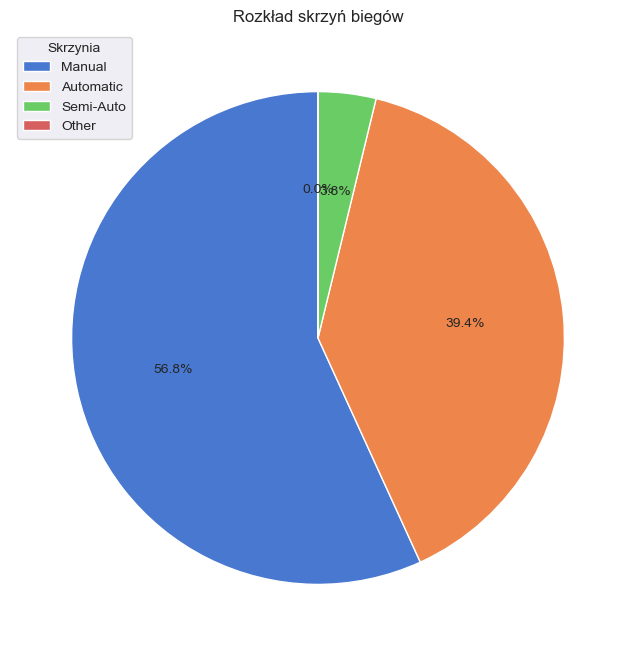

In [19]:
counts = df['transmission'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(counts,autopct="%1.1f%%", startangle=90,colors=sns.color_palette("muted"))
plt.legend(counts.index, title="Skrzynia", loc="upper left")
plt.title("Rozkład skrzyń biegów")
plt.show()

In [20]:
counts

transmission
Manual       3822
Automatic    2650
Semi-Auto     254
Other           1
Name: count, dtype: int64

Rozkład ilości ogłoszeń dla każdego z modeli

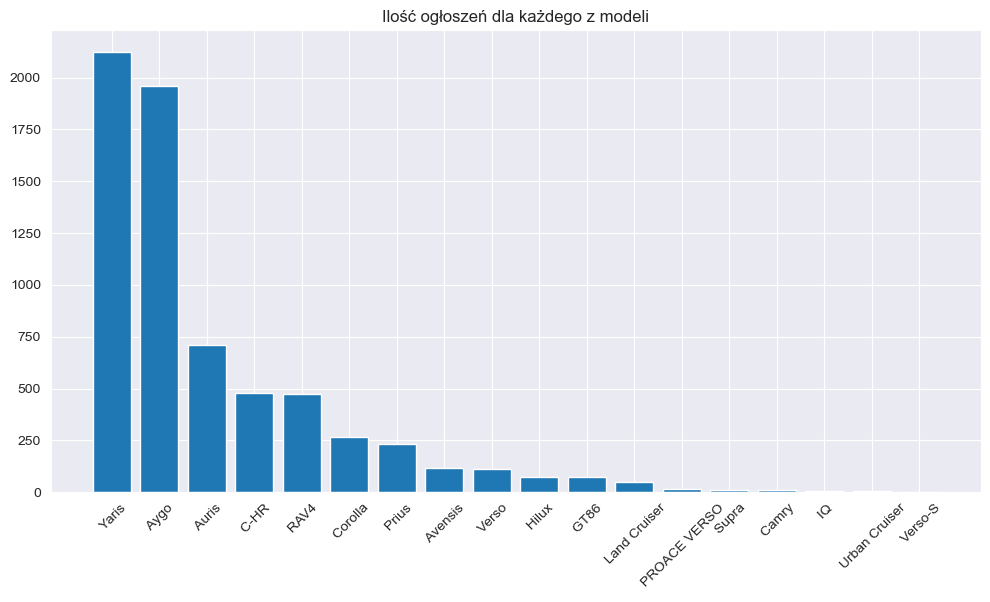

In [21]:
counts_models = df['model'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(counts_models.index,counts_models.values,align='center')
plt.title('Ilość ogłoszeń dla każdego z modeli')
plt.xticks(rotation=45)
plt.show()

Wykres przedstawiający zależność ceny od rocznika samochodu (z dopasowaną krzywą regresji)

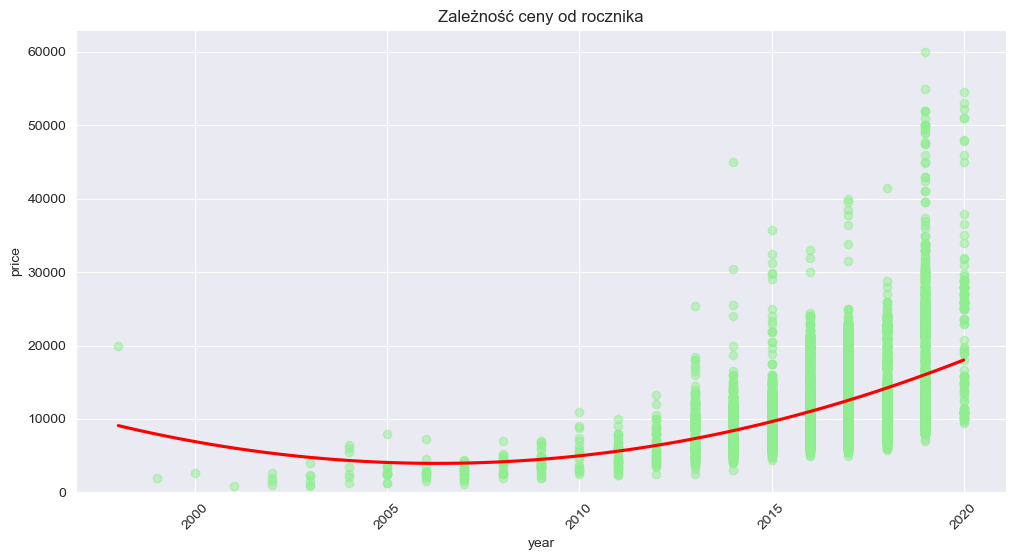

In [22]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df,x='year',y='price',order=2,ci=None,scatter_kws={'alpha': 0.5,'color':'lightgreen'},line_kws={'color': 'red'})
plt.title('Zależność ceny od rocznika')
plt.xticks(rotation=45)
plt.ylim(0,)
plt.show()

Ciekawym punktem na wykresie jest najstarszy samochód w zbiorze danych:

In [23]:
oldest = df.loc[df['year'].idxmin()]
oldest

model            Land Cruiser
year                     1998
price                   19990
transmission           Manual
fuelType               Diesel
engineSize                4.2
l/100km                 11.82
km                     160934
age                        28
Name: 6694, dtype: object

Wykres przedstawiający jak zmienia się średnia cena samochodu w zależności od jego wieku

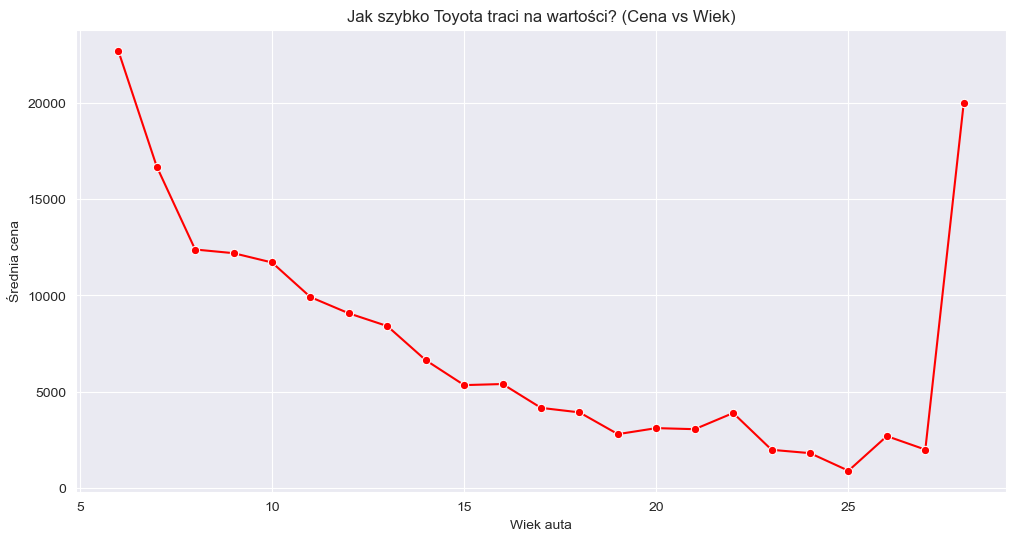

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='age', y='price', marker='o', color='red',errorbar=None)
plt.title('Jak szybko Toyota traci na wartości? (Cena vs Wiek)')
plt.xlabel('Wiek auta')
plt.ylabel('Średnia cena')
plt.show()

Położenie 'perełek' na wykresie Cena vs Przebieg

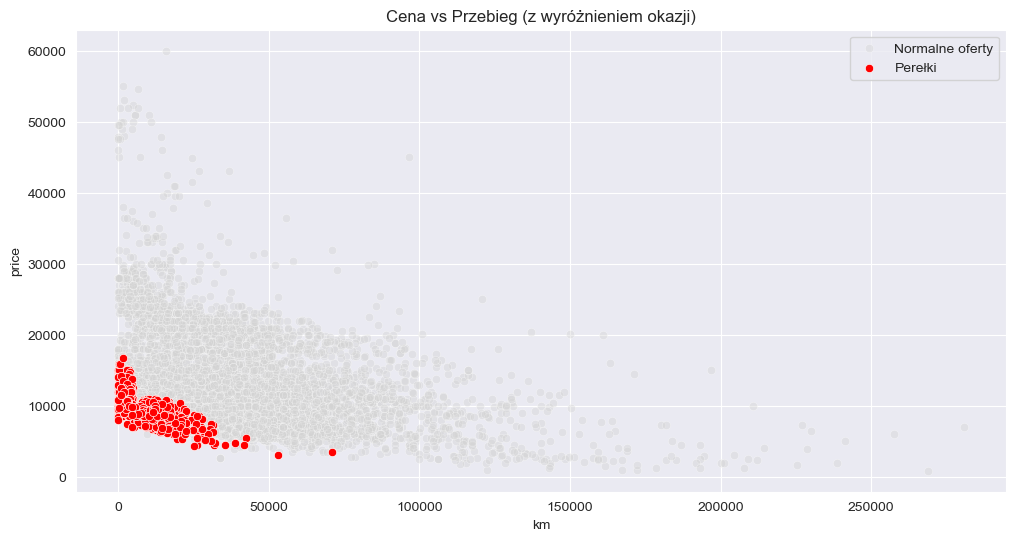

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='km', y='price', color='lightgrey', alpha=0.4, label='Normalne oferty')
sns.scatterplot(data=bargains, x='km', y='price', color='red', label='Perełki')
plt.title('Cena vs Przebieg (z wyróżnieniem okazji)')
plt.legend()
plt.show()